Epoch 1/10
1875/1875 [==============================] - 62s 32ms/step - loss: 0.4082 - accuracy: 0.8525
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2682 - accuracy: 0.9031
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2243 - accuracy: 0.9175
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1905 - accuracy: 0.9292
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1634 - accuracy: 0.9385
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1392 - accuracy: 0.9478
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1160 - accuracy: 0.9561
Epoch 8/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0975 - accuracy: 0.9636
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0825 - accuracy: 0.9694
Epoch 10/10
1875/1875 [==============================] - 53s 28m

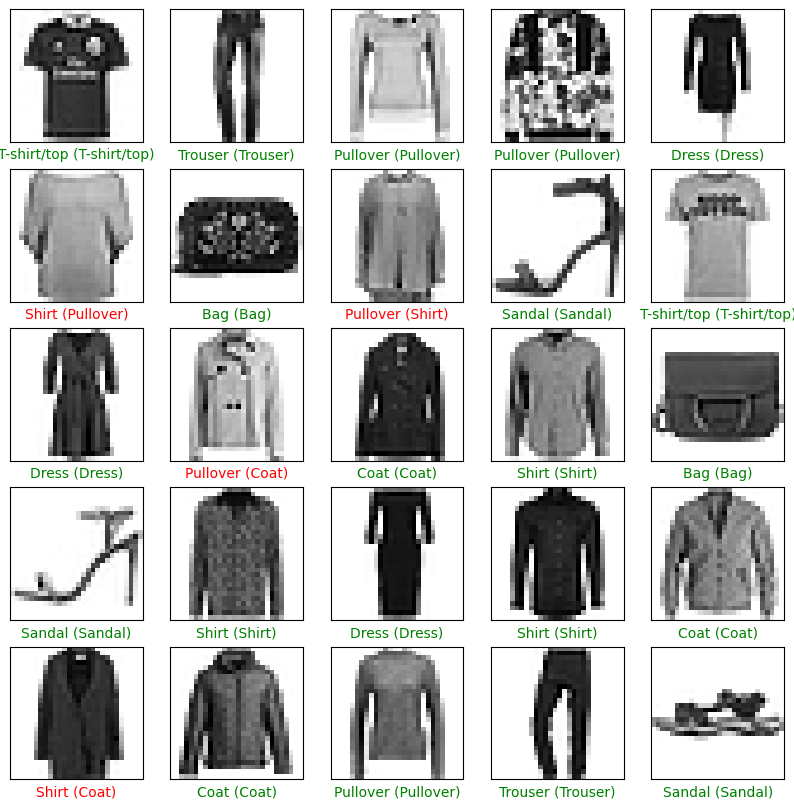

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Load the data from CSV files
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

# Split the data into features and labels
x_train = train_df.drop("label", axis=1).values.reshape(-1, 28, 28, 1) / 255.0
x_test = test_df.drop("label", axis=1).values.reshape(-1, 28, 28, 1) / 255.0

y_train = train_df["label"].values
y_test = test_df["label"].values

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define and train a deep learning model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

# Make predictions on new data
predictions = model.predict(x_test)

# Plot some images with their predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]),
                                color=color)

plt.show()


In [3]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
